In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, f1_score,accuracy_score,precision_score,recall_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')


In [2]:
!pip install -q gdown
import gdown

gdown.download("https://drive.google.com/uc?id=1ZK9mAvkGBZTim2twmd-VtR23huWKNk1G",
               "personality_traits.csv", quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1ZK9mAvkGBZTim2twmd-VtR23huWKNk1G
To: /content/personality_traits.csv
100%|██████████| 107k/107k [00:00<00:00, 39.2MB/s]


'personality_traits.csv'

In [3]:
import pandas as pd
df = pd.read_csv("personality_traits.csv")
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


# **Data Preprocessing & Exploratory Data Analysis**

In [4]:
# Display basic information

print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (2900, 8)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB
None

Missing Values:
Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency            

In [5]:
# Number of unique values and unique values in each column

for col in df.columns:
    unique_vals = df[col].unique()
    print(f"Column: {col}")
    print(f"Number of unique values: {len(unique_vals)}")
    print(f"Unique values: {unique_vals}")
    print("-" * 60)

Column: Time_spent_Alone
Number of unique values: 13
Unique values: [ 4.  9.  0.  3.  1.  2. 10.  6.  5.  8. nan  7. 11.]
------------------------------------------------------------
Column: Stage_fear
Number of unique values: 3
Unique values: ['No' 'Yes' nan]
------------------------------------------------------------
Column: Social_event_attendance
Number of unique values: 12
Unique values: [ 4.  0.  1.  6.  9.  7.  8.  3.  5.  2. 10. nan]
------------------------------------------------------------
Column: Going_outside
Number of unique values: 9
Unique values: [ 6.  0.  2.  7.  4.  5. nan  3.  1.]
------------------------------------------------------------
Column: Drained_after_socializing
Number of unique values: 3
Unique values: ['No' 'Yes' nan]
------------------------------------------------------------
Column: Friends_circle_size
Number of unique values: 17
Unique values: [13.  0.  5. 14.  8.  6.  7. 15.  4. 10.  1. 12.  2. 11.  9.  3. nan]
----------------------------------

In [6]:
# Numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Categorical columns
categorical_cols = df.drop(['Personality'],axis=1).select_dtypes(include=['object']).columns.tolist()

# Target column
target_col = 'Personality'

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)
print("Target Column:", target_col)


Numerical Columns: ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
Categorical Columns: ['Stage_fear', 'Drained_after_socializing']
Target Column: Personality


In [7]:
# Target column class distribution

df[target_col].value_counts()

,count
Personality,
Extrovert,1491
Introvert,1409


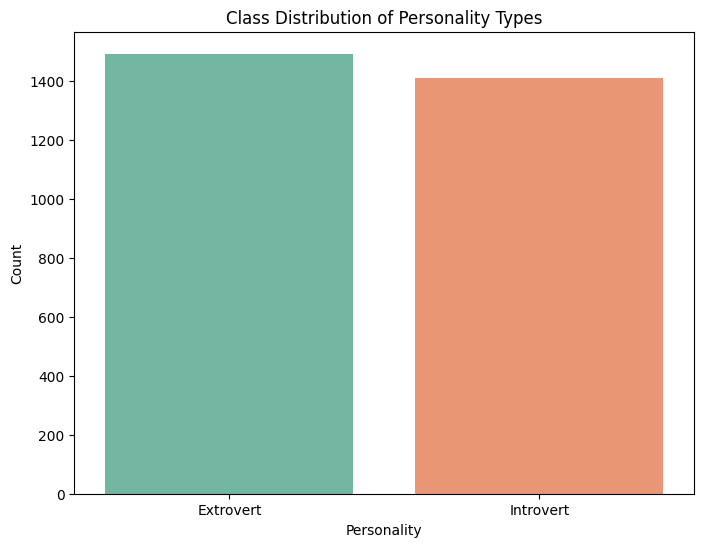

In [8]:
# Count plot for class distribution

plt.figure(figsize=(8, 6))
sns.countplot(x=target_col, data=df,palette='Set2')
plt.title('Class Distribution of Personality Types')
plt.xlabel('Personality')
plt.ylabel('Count')
plt.show()

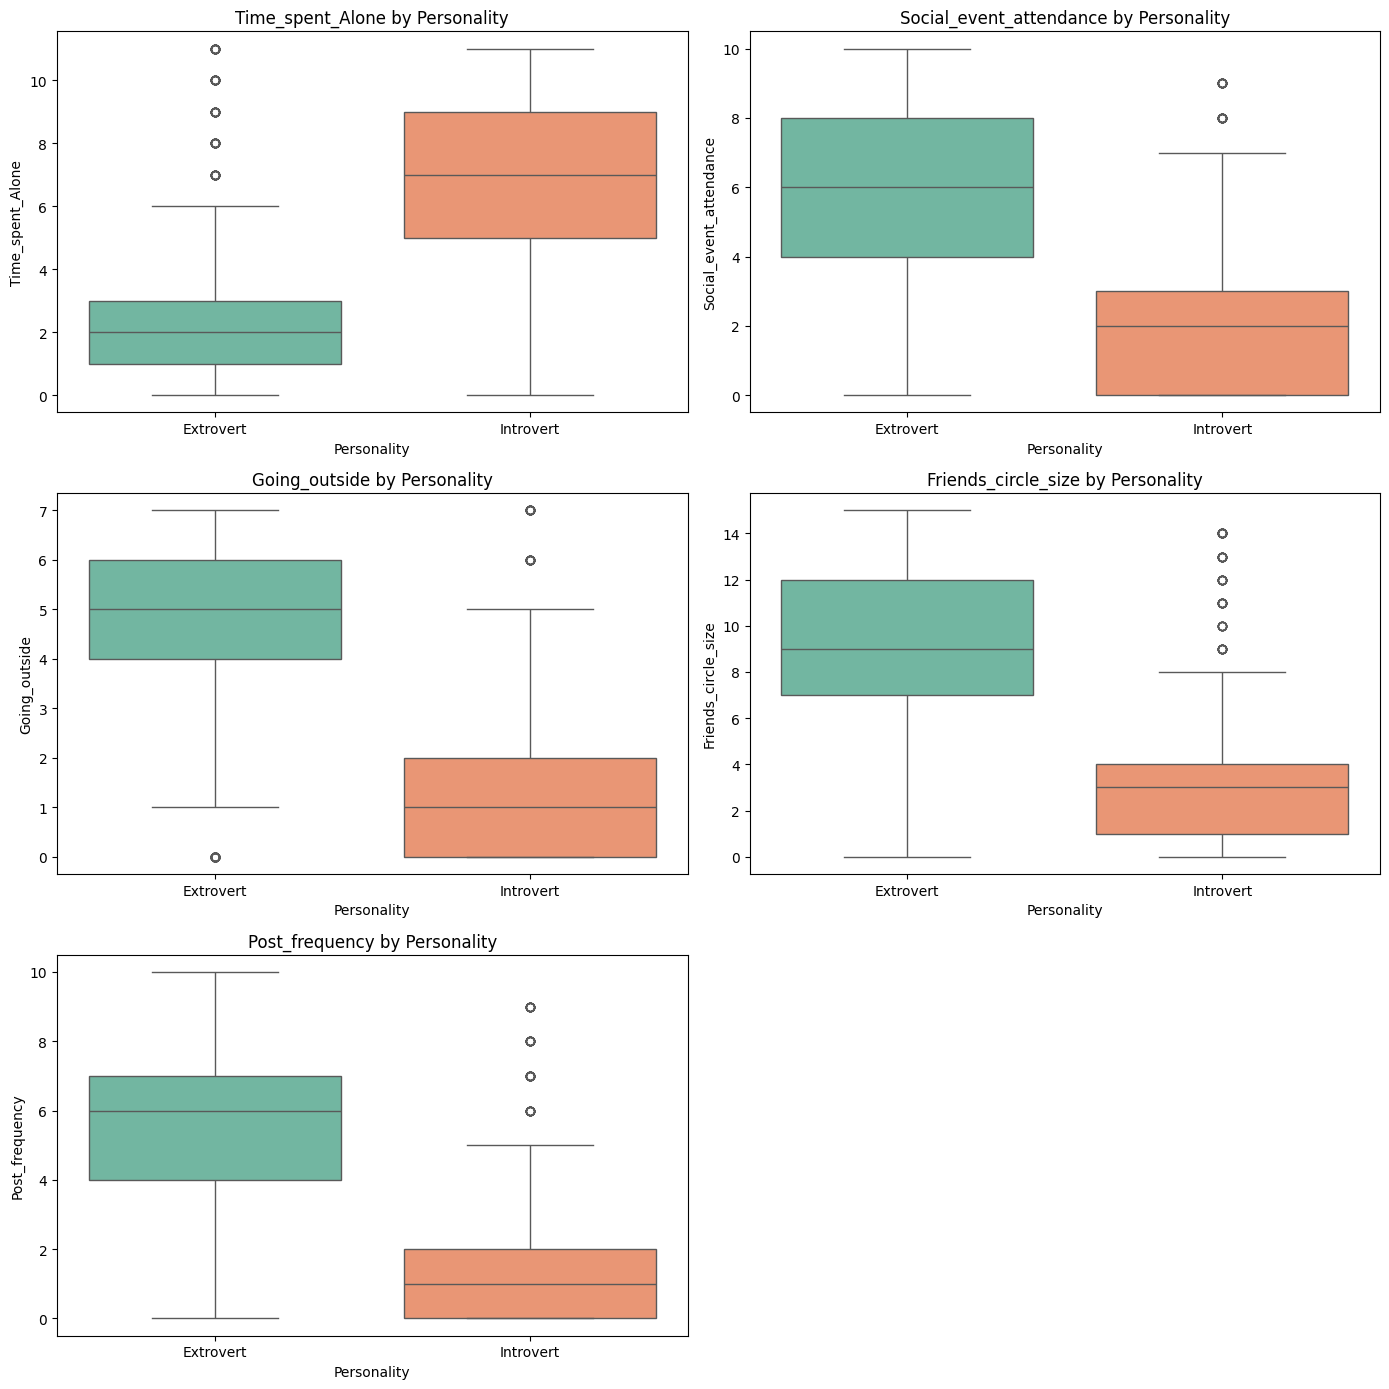

In [9]:
# Numeric feature distributions by class

plt.figure(figsize=(14, 14))
for i, col in enumerate(numerical_cols,1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=target_col, y=col, data=df,palette='Set2')
    plt.title(f'{col} by Personality')
plt.tight_layout()
plt.show()

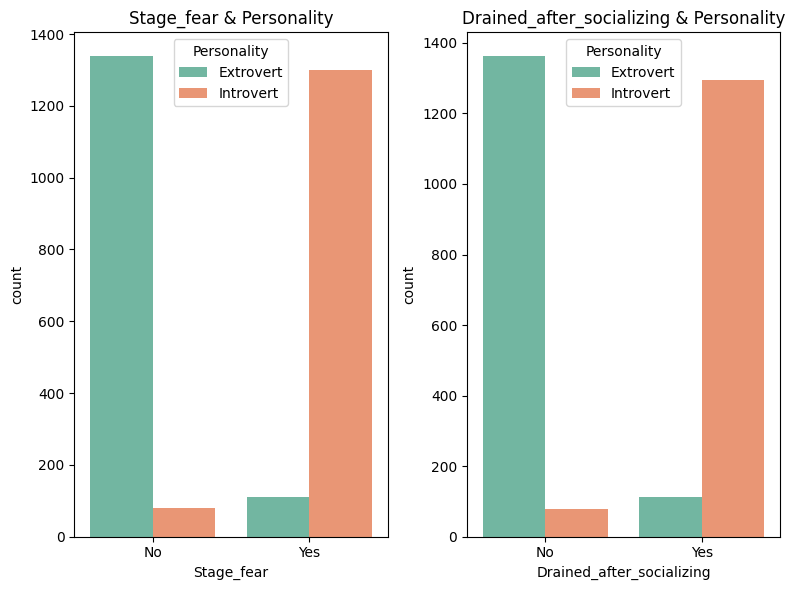

In [10]:
# Categorical feature distributions by class

plt.figure(figsize=(8,6))
for i, col in enumerate(categorical_cols,1):
    plt.subplot(1, 2, i)
    sns.countplot(data=df, x=col, hue=target_col, palette='Set2')
    plt.title(f'{col} & Personality')
plt.tight_layout()
plt.show()

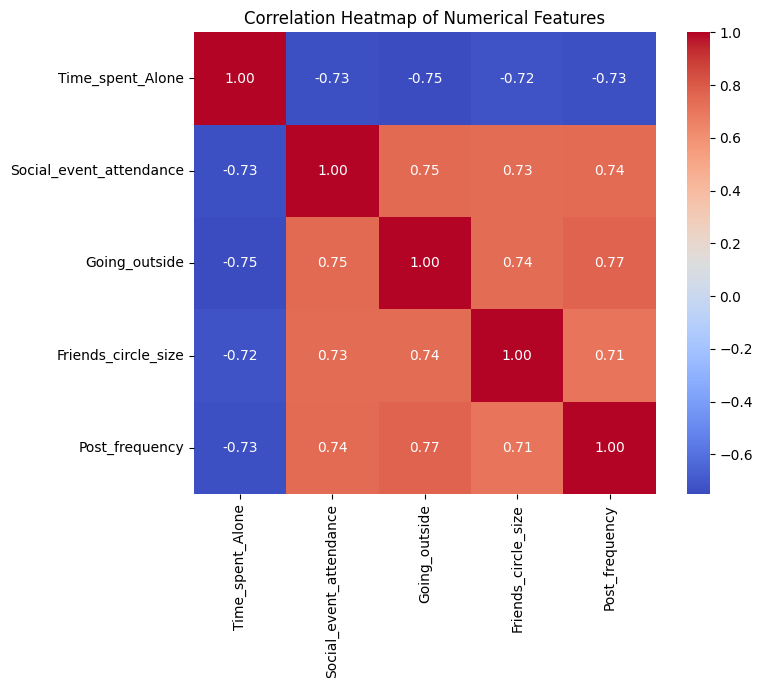

In [11]:
#Correlation matrix

corr_matrix = df[numerical_cols].corr()

#Plot heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [12]:
# Statistical Summary Numerical Columns

df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [13]:
# Statistical Summary of Categorical Columns

df.describe(include='object')

,Stage_fear,Drained_after_socializing,Personality
count,2827,2848,2900
unique,2,2,2
top,No,No,Extrovert
freq,1417,1441,1491


In [14]:
# Encoding categorical to numerical

df['Stage_fear'] = df['Stage_fear'].map({'Yes': 1, 'No': 0})
df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'Yes': 1, 'No': 0})
df['Personality'] = df['Personality'].map({'Extrovert': 1, 'Introvert': 0})

In [15]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0.0,4.0,6.0,0.0,13.0,5.0,1
1,9.0,1.0,0.0,0.0,1.0,0.0,3.0,0
2,9.0,1.0,1.0,2.0,1.0,5.0,2.0,0
3,0.0,0.0,6.0,7.0,0.0,14.0,8.0,1
4,3.0,0.0,9.0,4.0,0.0,8.0,5.0,1


In [16]:
# Missing Values Treatment

# Numeric features: impute with mean
numeric_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = numeric_imputer.fit_transform(df[numerical_cols])


In [17]:
df.isnull().sum()

,0
Time_spent_Alone,0
Stage_fear,73
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,52
Friends_circle_size,0
Post_frequency,0
Personality,0


In [18]:
#KNN imputation for categorical columns

target_cols = ['Stage_fear', 'Drained_after_socializing']
scale_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside','Friends_circle_size', 'Post_frequency']

df1 = df.drop(['Personality'], axis=1).copy()

scaler = StandardScaler()
df1[scale_cols] = scaler.fit_transform(df1[scale_cols])

imputer = KNNImputer(n_neighbors=3)
df1_imputed = pd.DataFrame(imputer.fit_transform(df1), columns=df1.columns)

df1_imputed[scale_cols] = scaler.inverse_transform(df1_imputed[scale_cols])

for col in target_cols:
    df[col] = df[col].fillna(df1_imputed[col])


In [19]:
df.isnull().sum()

,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0
Personality,0


In [20]:
# Checking for Outliers Using Z_Score

from scipy.stats import zscore

z_scores = df.select_dtypes(include='number').apply(zscore)
outliers_z = (abs(z_scores) > 3)
outliers_z.sum()


,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0
Personality,0


# **Model Training & Evaluation**

In [21]:
# Train-Test Split

X=df.drop('Personality',axis=1)
y=df['Personality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [22]:
# # Handling class imbalance with SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [23]:
scaler=StandardScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X.columns)
X_test=pd.DataFrame(scaler.transform(X_test),columns=X.columns)

In [24]:
# Logistic Regression

pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('logreg', LogisticRegression(random_state=42,max_iter=1000))
])

param_grid = {
    'poly__degree': [1, 2, 3],
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__solver': ['lbfgs'],
    'logreg__penalty': ['l2']
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('logreg',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.01, 0.1, 1, 10, 100],
                         'logreg__penalty': ['l2'], 'logreg__solver': ['lbfgs'],
                         'poly__degree': [1, 2, 3]},
             scoring='accuracy')

In [25]:
best_model_lg = grid.best_estimator_

y_pred_lg = best_model_lg.predict(X_test)

print("Best Parameters:\n", grid.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred_lg))
print("Accuracy Score:\n", accuracy_score(y_test, y_pred_lg))

Best Parameters:
 {'logreg__C': 0.01, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs', 'poly__degree': 1}

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       278
           1       0.94      0.92      0.93       302

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580

Accuracy Score:
 0.9293103448275862


In [26]:
lgr_accuracy = accuracy_score(y_test, y_pred_lg)
lgr_precision = precision_score(y_test, y_pred_lg)
lgr_recall = recall_score(y_test, y_pred_lg)
lgr_f1 = f1_score(y_test, y_pred_lg)

In [27]:
# SVM Classification

svm_model = SVC(kernel='rbf',random_state=42)

param_grid = {
    'C': [0.1, 1, 10, 100],         # Regularization parameter
    'gamma': ['scale', 0.01, 0.1, 1]  # Kernel coefficient
}

svm_grid = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 0.01, 0.1, 1]},
             scoring='accuracy')

In [28]:
svm_best_model = svm_grid.best_estimator_

y_pred_svm = svm_best_model.predict(X_test)

print("Best Parameters:\n", svm_grid.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("Accuracy Score:\n", accuracy_score(y_test, y_pred_svm))
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

Best Parameters:
 {'C': 0.1, 'gamma': 'scale'}

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       278
           1       0.94      0.92      0.93       302

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580

Accuracy Score:
 0.9293103448275862


In [29]:
# Random Forest Classifier

rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_grid = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [30]:
rf_best_model = rf_grid.best_estimator_
y_pred_rf = rf_best_model.predict(X_test)

print("Best Parameters:\n", rf_grid.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy Score:\n", accuracy_score(y_test, y_pred_rf))
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

Best Parameters:
 {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       278
           1       0.94      0.92      0.93       302

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580

Accuracy Score:
 0.9258620689655173


In [31]:
# XGBoost Classifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_grid = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [32]:
xgb_best_model = xgb_grid.best_estimator_
y_pred_xgb = xgb_best_model.predict(X_test)

print("Best Parameters:\n", xgb_grid.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("Accuracy Score:\n", accuracy_score(y_test, y_pred_xgb))
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)

Best Parameters:
 {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       278
           1       0.94      0.92      0.93       302

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580

Accuracy Score:
 0.9275862068965517


In [33]:
model_metrics = {
    'Model': ['Logistic Regression', 'SVM (RBF Kernel)', 'Random Forest', 'XGBoost'],
    'Accuracy': [lgr_accuracy, svm_accuracy, rf_accuracy, xgb_accuracy],
    'Precision': [lgr_precision, svm_precision, rf_precision, xgb_precision],
    'Recall': [lgr_recall, svm_recall, rf_recall, xgb_recall],
    'F1 Score': [lgr_f1, svm_f1, rf_f1, xgb_f1]
}

metrics_df = pd.DataFrame(model_metrics)

styled_metrics = metrics_df.style\
    .background_gradient(cmap='YlGnBu', subset=['Accuracy', 'Precision', 'Recall', 'F1 Score'])\
    .set_properties(**{'text-align': 'center'})\
    .set_table_styles([dict(selector='th', props=[('text-align', 'center')])])\
    .set_caption("🔍 Model Performance Comparison")

styled_metrics


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.929310,0.942373,0.920530,0.931323
1,SVM (RBF Kernel),0.929310,0.942373,0.920530,0.931323
2,Random Forest,0.925862,0.936027,0.920530,0.928214
3,XGBoost,0.927586,0.942177,0.917219,0.929530


**Model Performance Summary**

**Overview**
Four different machine learning models were evaluated for this classification task, with performance measured across key metrics including accuracy, precision, recall, and F1-score.

**Key Findings**

**Top Performers:** Logistic Regression and SVM (RBF Kernel) achieved identical performance across all metrics, emerging as the best-performing models with:
- **Accuracy:** 92.93%
- **Precision:** 94.24%
- **Recall:** 92.05%
- **F1-Score:** 93.13%

**Strong Alternatives:** XGBoost demonstrated competitive performance (92.76% accuracy, 92.95% F1-score), while Random Forest showed slightly lower but still robust results (92.59% accuracy, 92.82% F1-score).

**Recommendations**

Given the identical top performance of Logistic Regression and SVM, **Logistic Regression** is recommended as the final model due to its simplicity, interpretability, and computational efficiency while maintaining the highest performance metrics. The consistently high precision across all models (93.60-94.24%) indicates strong reliability in positive predictions, while the balanced F1-scores demonstrate good overall classification performance.

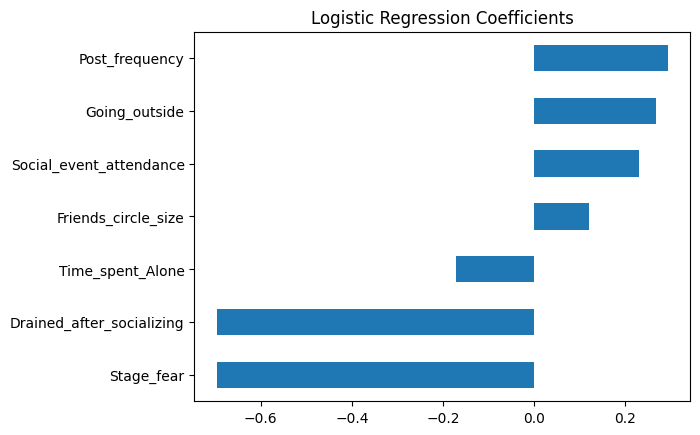

In [34]:
# Model Interpretability from Logistic Regression

logreg_model = best_model_lg.named_steps['logreg']
coefficients = pd.Series(logreg_model.coef_[0], index=X_train.columns)
coefficients.sort_values().plot(kind='barh', title='Logistic Regression Coefficients')
plt.show()

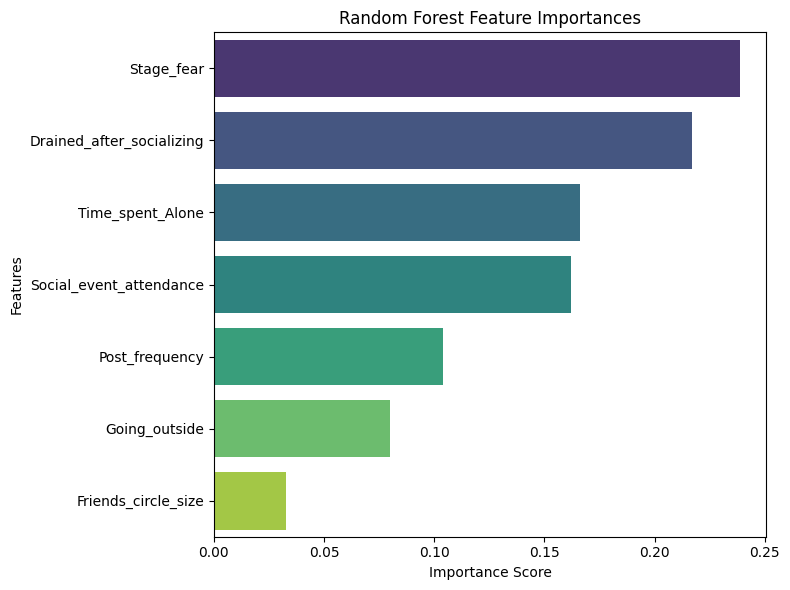

In [35]:
# Feature Importance from Random Forest


importances = rf_best_model.feature_importances_

feature_importance = pd.Series(importances, index=X_train.columns)

feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

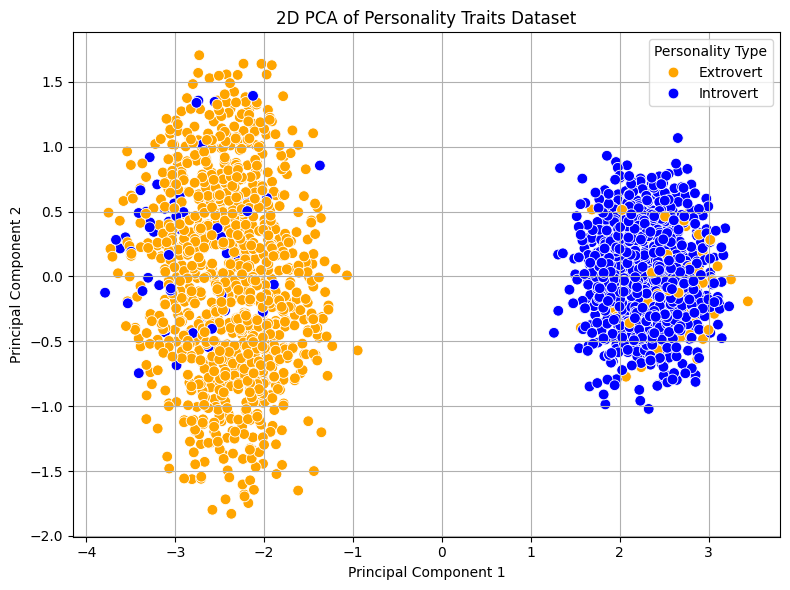

In [36]:
# 2D Visualization using PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Personality'] = y_train.values
pca_df['Personality_Label'] = pca_df['Personality'].map({0: 'Introvert', 1: 'Extrovert'})

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pca_df,
    x='PC1', y='PC2',
    hue='Personality_Label',
    palette={'Introvert': 'blue', 'Extrovert': 'orange'},
    s=60
)

plt.title('2D PCA of Personality Traits Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Personality Type')
plt.grid(True)
plt.tight_layout()
plt.show()